In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [3]:
df = pd.read_csv("./dataset2/database_dataset2.csv") 

In [4]:
df['SNR_AVG'] = df['s_source_AVG']/np.sqrt( df['s_source_AVG'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_AVG'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))

df['SNR_median'] = df['s_source_median']/np.sqrt( df['s_source_median'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_median'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))

df['SNR_sum'] = df['s_source_sum']/np.sqrt( df['s_source_sum'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_sum'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))


In [5]:
df.to_csv("dataset.csv", index=False)

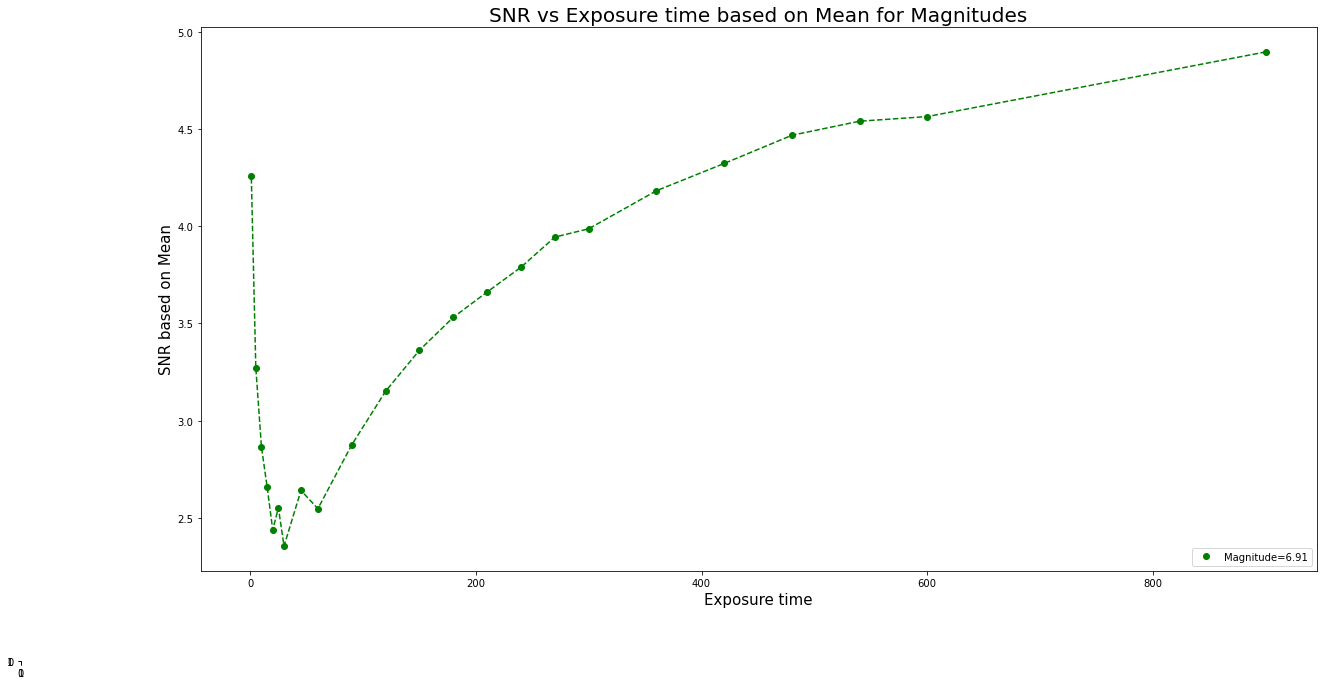

In [8]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'go', label='Magnitude=6.91')
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'g--')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'b^', label='i_prime')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'b-.')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'rx', label='r_prime')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'r:')
ax1.set_title('SNR vs Exposure time based on Mean for Magnitudes', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Mean',fontsize=15)
ax1.legend(loc=4)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,0,0])
# Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.05,0.5,0.3,0.45])
# ax2.set_axes_locator(ip)

# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'go', label='g_prime')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'g--')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'b^', label='i_prime')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'b-.')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'rx', label='r_prime')
# plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'r:')
# ax2.set_xlim(0,60)
# ax2.set_ylim(2,6)
# plt.savefig('snr_expt_filters.png')
plt.show()